<a href="https://colab.research.google.com/github/PavlovGeorgiy/portfolio/blob/main/%D0%94%D0%BE%D0%B2%D0%B5%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B2%D0%B0%D0%BB%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install scipy

In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
%matplotlib inline
import seaborn as sns

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
sigma = 15  # Стандартное отклонение
Z = 1.96  # Квантиль нормального распределения.
Delta = 3 # Погрешность

n = round(int(((sigma*Z)/Delta)**2), 0)
print('минимально необходимый объем выборки для построения интервальной оценки среднего', n)

минимально необходимый объем выборки для построения интервальной оценки среднего 96


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
### Ваши код/вычесления...
np.random.seed(42)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
dataT = st.norm.rvs(loc=130, scale=15, size=25)
dataT

array([137.4507123 , 127.92603548, 139.71532807, 152.84544785,
       126.48769938, 126.48794565, 153.68819223, 141.51152094,
       122.95788421, 138.13840065, 123.04873461, 123.0140537 ,
       133.62943407, 101.30079633, 104.12623251, 121.56568706,
       114.80753319, 134.71370999, 116.37963887, 108.81544448,
       151.98473153, 126.61335549, 131.01292307, 108.62877721,
       121.83425913])

In [ ]:
ci_lower, ci_upper = st.t.interval(alpha=0.98, df=len(dataT)-1, loc=np.mean(dataT), scale=st.sem(dataT))
L = int(round(ci_upper - ci_lower, 0))
print('длина полученного доверительного интервала', L)

длина полученного доверительного интервала 14


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [ ]:
import scipy.stats as stats
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

# H0: Различие между выборками незначительно
# H1: Различие между выборками значительно
t, p_value = stats.ttest_ind(mens, womens) #Критерий Стьюдента (t-test)

if p_value < 0.001:
  print(f'p_value = {p_value:.4f}, значит отвергаем нулевую гипотезу. Различия между выборками, вероятно, значительны')
else:
  print(f'p_value = {p_value:.4f}, значит принимаем нулевую гипотезу. Различия между выборками, вероятно, незначительны')

p_value = 0.0002, значит отвергаем нулевую гипотезу. Различия между выборками, вероятно, значительны


(array([7.0000e+00, 7.4000e+01, 5.0100e+02, 2.4200e+03, 7.8620e+03,
        1.8573e+04, 3.0450e+04, 3.5460e+04, 2.8908e+04, 1.6710e+04,
        6.6670e+03, 1.9520e+03, 3.6100e+02, 5.2000e+01, 3.0000e+00]),
 array([-275.56038635, -215.37559577, -155.19080519,  -95.00601461,
         -34.82122403,   25.36356655,   85.54835713,  145.73314771,
         205.91793829,  266.10272888,  326.28751946,  386.47231004,
         446.65710062,  506.8418912 ,  567.02668178,  627.21147236]),
 <a list of 15 Patch objects>)

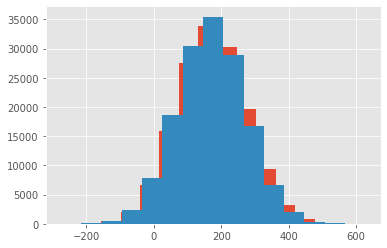

In [ ]:
plt.hist(womens, bins=15);
plt.hist(mens, bins=15)

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей.

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
sigma = 150  # Стандартное отклонение
Z = 1.96  # Квантиль нормального распределения.
Delta = 50 # Погрешность

n = round(int(((sigma*Z)/Delta)**2), 0)
print(f'необходимый объем выборки для исследования {n} ')

необходимый объем выборки для исследования 34 


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations) #Возможно пригодится эта функция.

print(f'Статистика = {oddsratio:.5f}, pvalue = {pvalue:.5f}')

# H0: 'волшебник' предсказывает погоду случайно
# H1: 'волшебник' умеет предсказывать погоду!

if pvalue < 0.05:
    print('отклоняем нулевую гипотезу, волшебник УМЕЕТ предсказывать погоду!')
else:
    print('принимаем нулевую гипотезу. Похоже, "волшебник" предсказывает погоду случайно')

Статистика = 0.58120, pvalue = 0.35418
принимаем нулевую гипотезу. Похоже, "волшебник" предсказывает погоду случайно


<div class="alert alert-info">
<b>Задание № 5</b>

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
def mean_confidence_interval(data, confidence=0.90):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству?
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]


# H0: выборки относятся к одному множеству.
# H1: выборки не относятся к одному множеству

stat, p = st.mannwhitneyu(A, B)

print(f"Статистика = {stat}, p = {p}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, выборки относятся к одному множеству')
else:
    print('Отклоняем нулевую гипотезу, выборки не относятся к одному множеству')

Статистика = 9280.5, p = 9.602040500172804e-21
Отклоняем нулевую гипотезу, выборки не относятся к одному множеству


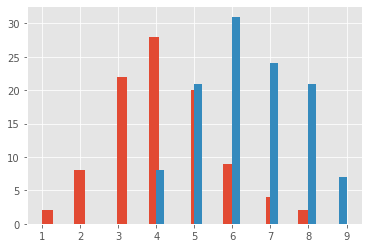

In [ ]:
plt.hist(B, bins=25);
plt.hist(A, bins=25);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:

По значению p-value без уровня стат. значимости нельзя принять или отвергнуть нулевую гипотезу


<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы?
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

# H0: различия являются случайными
# H1: имеется значимое различие эффективности препаратов А и B

med_df = pd.DataFrame({"препарат А":A,
                       "препарат B":B,
                       "разница": B-A})
med_df.describe()

,препарат А,препарат B,разница
count,300.000000,300.000000,300.000000
mean,168.996623,171.279351,2.282728
std,14.514851,14.112601,19.429630
min,129.200222,122.956041,-49.073255
25%,158.845516,162.917094,-9.799642
50%,168.725478,171.314729,2.711816
75%,178.949547,179.880765,14.574167
max,202.027845,205.292058,57.751642


In [ ]:
 stats.ttest_rel(a=A, b=B)

Ttest_relResult(statistic=-2.0349336314319992, pvalue=0.042739435733033855)

pvalue= 0.04, уровень значимости = 0.05, значит мы отвергаем нулевую гипотезу и имеется значимое различие эффективности препаратов

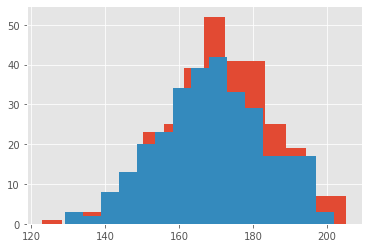

In [ ]:
plt.hist(B, bins=15);
plt.hist(A, bins=15);